<a href="https://colab.research.google.com/github/patelishaan/polynomial-regression-and-cross-validation/blob/main/poly_reg_and_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
df = pd.read_csv('Ice_cream selling data.csv')

In [6]:
df.head(4)

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845


<Axes: >

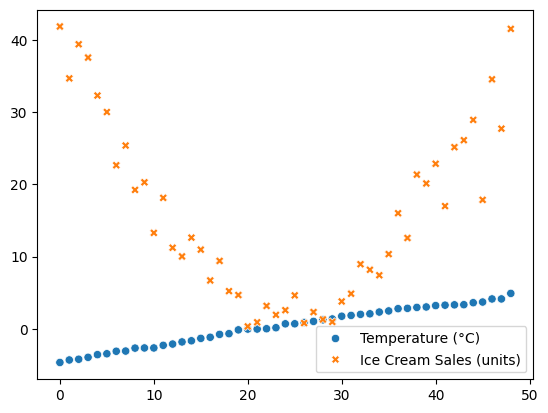

In [9]:
sns.scatterplot(df)

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
x = df[['Temperature (°C)']].values
y = df['Ice Cream Sales (units)'].values #target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [17]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [18]:
import matplotlib.pyplot as plt

In [21]:
y_pred = model.predict(X_test_poly)

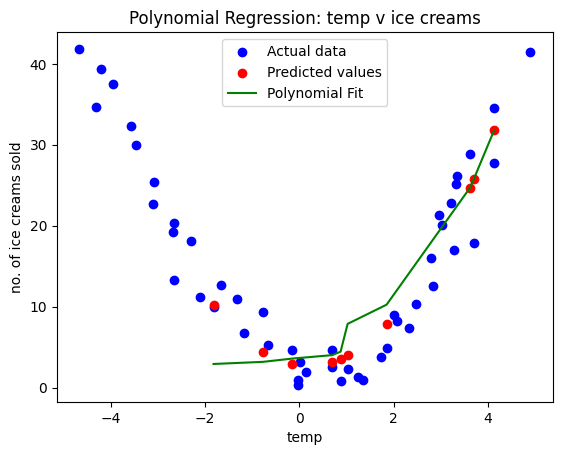

In [22]:
# Visualizing the polynomial regression fit
plt.scatter(x, y, color='blue', label="Actual data")
plt.scatter(X_test, y_pred, color='red', label="Predicted values")
plt.plot(np.sort(X_test, axis=0), np.sort(y_pred, axis=0), color='green', label="Polynomial Fit")
plt.xlabel("temp")
plt.ylabel("no. of ice creams sold")
plt.legend()
plt.title("Polynomial Regression: temp v ice creams")
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R² Score (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Squared Error: 14.878796440981484
R² Score: 0.843055137193884


In [25]:
df.shape

(49, 2)

In [40]:
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [41]:
# Define LOOCV
loo = LeaveOneOut()

In [42]:
# Store errors
mse_scores = []

# Loop through each LOOCV iteration
for train_index, test_index in loo.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Polynomial feature transformation (degree 2)
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make prediction
    y_pred = model.predict(X_test_poly)

    # Compute and store MSE
    mse_scores.append(mean_squared_error(y_test, y_pred))

In [43]:
# Compute final LOOCV error
final_mse = np.mean(mse_scores)
print(f"Mean Squared Error using LOOCV: {final_mse}")

Mean Squared Error using LOOCV: 11.643246086561444


In [33]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np








Mean Squared Error using 5-Fold CV: 11.222666687024141
Mean R² Score using 5-Fold CV: 0.9093432468624497


In [46]:
# Define K-Fold Cross-Validation
k = 5  # Set number of folds
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [47]:
# Store errors
mse_scores = []
r2_scores = []


In [48]:
# Loop through each fold
for train_index, test_index in kf.split(x):
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Polynomial feature transformation (degree 2)
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # Train model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Make prediction
    y_pred = model.predict(X_test_poly)

    # Compute and store MSE
    mse_scores.append(mean_squared_error(y_test, y_pred))

    # Compute and store R² Score
    r2_scores.append(r2_score(y_test, y_pred))

# Compute final Cross-Validation MSE and R² Score
final_mse = np.mean(mse_scores)
final_r2 = np.mean(r2_scores)

In [49]:
print(f"Mean Squared Error using {k}-Fold CV: {final_mse}")
print(f"Mean R² Score using {k}-Fold CV: {final_r2}")

Mean Squared Error using 5-Fold CV: 11.222666687024141
Mean R² Score using 5-Fold CV: 0.9093432468624497
